In [17]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
#import tensorflow as tf

# Import our input dataset
data = Path('./Data/merged_clean_df.csv')
merged_df = pd.read_csv(data)
merged_df

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,state,reportedzipcode,stns,obs,pred,stn_lat,stn_lon,new_date_column,geometry,rolling_total_obs
0,NO CHATHAM,2015-02-21,999,AE,41.7,-70.0,3,1,1955-01-01,2618.18,MA,2650,14281,0.38,0.000000,41.6875,-69.9933,2/21/2015,POINT (-69.9933 41.6875),3.800000e-01
1,NEW BRAUNFELS,2015-10-30,2,AE,29.7,-98.1,3,1,2003-12-02,3309.59,TX,78130,490,15.62,11.490905,29.6874,-98.6527,10/30/2015,POINT (-98.6527 29.6874),1.562000e+01
2,NEW BRAUNFELS,2015-10-30,7,AE,29.7,-98.1,2,1,2003-07-01,0.00,TX,78130,490,15.62,11.490905,29.6874,-98.6527,10/30/2015,POINT (-98.6527 29.6874),1.562000e+01
3,NEW BRAUNFELS,2015-10-30,0,C,29.7,-98.1,3,1,1998-10-17,67301.33,TX,78132,490,15.62,11.490905,29.6874,-98.6527,10/30/2015,POINT (-98.6527 29.6874),1.562000e+01
4,NEW BRAUNFELS,2015-10-30,999,C,29.7,-98.1,3,3,1995-07-01,0.00,TX,78130,490,15.62,11.490905,29.6874,-98.6527,10/30/2015,POINT (-98.6527 29.6874),1.562000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52172,WEST COLUMBIA,2015-10-13,2,A20,34.0,-81.1,2,1,1990-09-01,0.00,SC,29169,3961,0.00,0.000000,33.9970,-81.1290,10/13/2015,POINT (-81.129 33.997),6.200000e-13
52173,COLUMBUS,2015-12-22,999,A,32.5,-84.9,1,1,1973-01-01,5779.26,GA,31906,3739,4.98,5.187531,32.5181,-84.9378,12/22/2015,POINT (-84.9378 32.5181),4.980000e+00
52174,ELLIJAY,2015-12-26,999,X,34.7,-84.5,3,1,1989-03-01,0.00,GA,30540,5397,0.00,NaN,34.0565,-84.5853,12/26/2015,POINT (-84.5853 34.0565),5.830000e-13
52175,HAMMOND,2014-04-11,999,A,44.5,-75.6,2,1,1976-01-01,0.00,NY,13646,17845,0.32,0.000000,45.3167,-65.8833,4/11/2014,POINT (-65.88330000000001 45.3167),3.200000e-01


In [21]:
#convert date columns to datetime64[ns] 
merged_df['originalconstructiondate'] =  pd.to_datetime(merged_df['originalconstructiondate'], format='%Y-%m-%d', errors='ignore')
merged_df['dateofloss'] =  pd.to_datetime(merged_df['dateofloss'], format='%Y-%m-%d', errors='ignore')

#merged_df.dtypes
#split the dates into sperate columns for dd, mm and yyyy
#split date of loss
merged_df[['lossyear','lossmonth','lossday']] = merged_df.dateofloss.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

#split original construction date
merged_df[['builtyear','builtmonth','builtday']] = merged_df.originalconstructiondate.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))


#convert split columns to floats
merged_df['lossyear'] = merged_df['lossyear'].astype(float)
merged_df['lossmonth'] = merged_df['lossmonth'].astype(float)
merged_df['builtyear'] = merged_df['builtyear'].astype(float)

#age of the property at the time of loss
merged_df['propertyage'] = merged_df['lossyear'] - merged_df['builtyear'] 

In [24]:
merged_df.head(3)

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,...,new_date_column,geometry,rolling_total_obs,lossyear,lossmonth,lossday,builtyear,builtmonth,builtday,propertyage
0,NO CHATHAM,2015-02-21,999,AE,41.7,-70.0,3,1,1955-01-01,2618.18,...,2/21/2015,POINT (-69.9933 41.6875),0.38,2015.0,2.0,21,1955.0,01,01,60.0
1,NEW BRAUNFELS,2015-10-30,2,AE,29.7,-98.1,3,1,2003-12-02,3309.59,...,10/30/2015,POINT (-98.6527 29.6874),15.62,2015.0,10.0,30,2003.0,12,02,12.0
2,NEW BRAUNFELS,2015-10-30,7,AE,29.7,-98.1,2,1,2003-07-01,0.00,...,10/30/2015,POINT (-98.6527 29.6874),15.62,2015.0,10.0,30,2003.0,07,01,12.0


In [56]:
#keeping chosen features and dropping all other columns from merged data

df = merged_df.copy()
df = df.drop("reportedzipcode", axis=1)
df = df.drop("dateofloss", axis=1)
df = df.drop("elevationdifference", axis=1)
df = df.drop("latitude", axis=1)
df = df.drop("longitude", axis=1)
df = df.drop("numberoffloorsintheinsuredbuilding", axis=1)
df = df.drop("originalconstructiondate", axis=1)
df = df.drop("reportedcity", axis=1)
df = df.drop("lossyear", axis=1)
df = df.drop("lossday", axis=1)
df = df.drop("builtyear", axis=1)
df = df.drop("builtmonth", axis=1)
df = df.drop("builtday", axis=1)
df = df.drop("stn_lat", axis=1)
df = df.drop("stn_lon", axis=1)
df = df.drop("geometry", axis=1)
df = df.drop("new_date_column", axis=1)

#dropping columns that might be providing redundant information
df = df.drop("obs", axis=1)
df = df.drop("pred", axis=1)
df = df.drop("stns", axis=1)


#df.head(3)
FEMA_encoded = pd.get_dummies(df, columns=["state", "floodzone", "occupancytype", "lossmonth"])

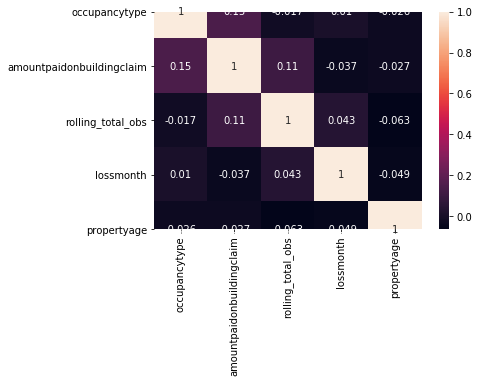

In [57]:
#generating a correlation matrix
corrMatrix = df.corr()

import seaborn as sn
sn.heatmap(corrMatrix, annot=True)

In [63]:
FEMA_encoded.columns.tolist()

['amountpaidonbuildingclaim',
 'rolling_total_obs',
 'propertyage',
 'state_AK',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_GU',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_PR',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VI',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'state_WY',
 'floodzone_A',
 'floodzone_A01',
 'floodzone_A02',
 'floodzone_A03',
 'floodzone_A04',
 'floodzone_A05',
 'floodzone_A06',
 'floodzone_A07',
 'floodzone_A08',
 'floodzone_A09',
 'floodzone_A10',
 'floodzone_A11',
 'floodzone_A12'

In [52]:
acc_rain = FEMA_encoded.apply(lambda x: True if x['rolling_total_obs'] < 0.1 else False , axis=1)
acc_rainrows = len(acc_rain[acc_rain == True].index)
print('Outliner Elevations <0 : ', acc_rainrows)

NoPayout = FEMA_encoded.apply(lambda x: True if x['amountpaidonbuildingclaim'] <= 0 else False , axis=1)
NoPayoutRows = len(NoPayout[NoPayout == True].index)
print('Payouts <0 : ', NoPayoutRows)

Outliner Elevations <0 :  15011
Payouts <0 :  14298


In [70]:
FEMA_encoded.rolling_total_obs.min()

-3.55e-15

In [64]:
acc_rain = FEMA_encoded.apply(lambda x: True if x['rolling_total_obs'] > 0 else False , axis=1)
acc_rainrows = len(acc_rain[acc_rain == True].index)
print('Outliner Elevations <0 : ', acc_rainrows)

Outliner Elevations <0 :  52176


In [71]:
FEMA_encoded_withrain = FEMA_encoded.copy()

indexNames = FEMA_encoded_withrain[FEMA_encoded_withrain['rolling_total_obs'] < 0.5 ].index
 
# Delete these row indexes from dataFrame
FEMA_encoded_withrain.drop(indexNames , inplace=True)

FEMA_encoded_withrain.rolling_total_obs.min()

0.5

In [72]:
y =FEMA_encoded_withrain.copy()
X = FEMA_encoded_withrain.copy()
X = X.drop("amountpaidonbuildingclaim", axis=1)

In [73]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['amountpaidonbuildingclaim'],
                                                   random_state=1)

In [74]:
# Train the Classifier

from sklearn.linear_model import LinearRegression

#random forest, neural networks with linear regression
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
score_with_rain= model.score(X_test, y_test)
score_with_rain

0.10639654770696316